In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
import os
import csv

In [2]:
#bulk process

#directory = '../20250626/06262/'
directory = './06262/'

edf_files = load_all_edf_files(directory)

output_filename = directory + "test.csv"
qmap_filename = directory + "qmap_output.npz"
mask_filename = directory + "mask.npz"


Q, angle, _, _ = load_Qmaps(qmap_filename)
mask, _, _, mesh_q, mesh_theta, _, qmin, qmax = load_qtheta_mask(mask_filename)

# Open CSV file for writing
with open(output_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header
    header = ['filename', 'P2', 'P4', 'theta_max [degrees]'] + [f'param_{i}' for i in range(6)] + ['smaller peak q [A-1]','larger peak q [A-1]', 'smaller peak 2pi/q [nm]',  'larger peak 2pi/q [nm]', ]
    writer.writerow(header)
    
    # Loop through files and save data
    for filename in edf_files:
        try:
            P2, P4, params, theta_max = procedure(directory + filename, Q, angle, mask, mesh_q, mesh_theta, qmin, qmax, flag_plot = False, save_plot = True)
            
            peak_positions = process_1D_data(filename, directory, save_plot = True)

            row = [filename, P2, P4, theta_max/np.pi*180] + list(params) + list(peak_positions) + list(2 * np.pi / np.array(peak_positions) / 10)
            writer.writerow(row)
            print(f"Processed: {filename}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

[0.15688703060074635, 1.3956833241754707]
Processed: 06262_0_vd_00003-00004.edf
[0.15688703060074635, 1.4079082875989055]
Processed: 06262_0_vd_00017-00018.edf
[0.16096201840855795, 1.4119832754067172]
Processed: 06262_0_vd_00035-00036.edf


In [3]:
data = read_dat_three_columns(directory + '06262_0_vd_00003-00004.dat')

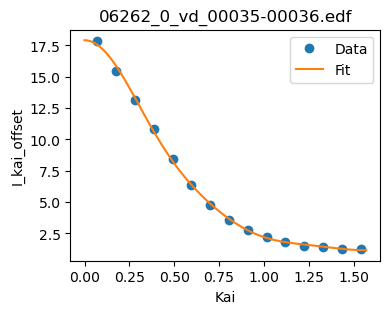

In [2]:
#single file

filename = '06262_0_vd_00035-00036.edf'

Q, angle, _, _ = load_Qmaps("qmap_output.npz")
mask, _, _, mesh_q, mesh_theta, _, qmin, qmax = load_qtheta_mask("mask.npz")

P2, P4, params, theta_max = procedure(filename, Q, angle, mask, mesh_q, mesh_theta, qmin, qmax, flag_plot = True, save_plot = True)